# Multiple Linear Regression

# # Bike Sharing Demand

### Problem Statement:: 
we are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 



## Step 1: Reading and Understanding the Data

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [3]:
# Read Data from csv
BikeSharing_Data= pd.read_csv('C://Users//Ankur//Downloads//LinearRegression-CaseStudy(Bike sharing Assignment)//day.csv')
BikeSharing_Data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
BikeSharing_Data.shape # To check shape of dataset

(730, 16)

In [5]:
BikeSharing_Data.info() # Tocheck null values 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 88.5+ KB


## Step 2: Visualising the data

Let's now spend some time doing what is arguably the most important step - understanding the data.

If there is some obvious multicollinearity going on, this is the first place to catch it
Here's where you'll also identify if some predictors directly have a strong association with the outcome variable
We'll visualise our data using matplotlib and seaborn.

#### Visualising Numeric Variables
Let's make a pairplot of all the numeric variables

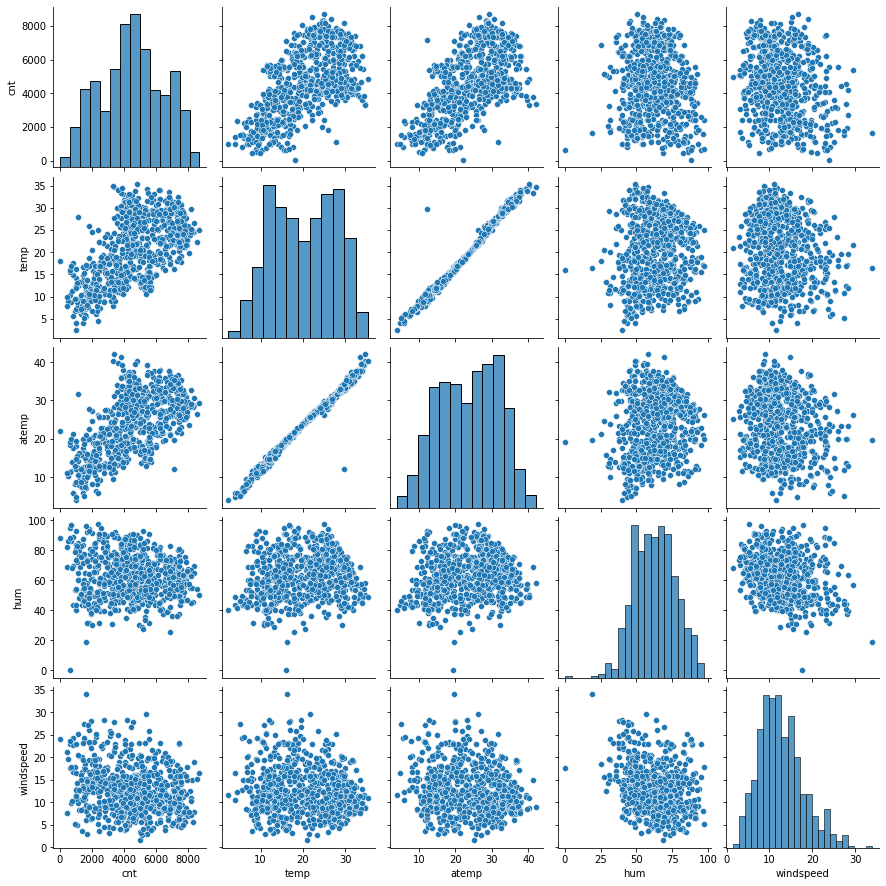

In [6]:
sns.pairplot(data=BikeSharing_Data, vars=['cnt','temp','atemp','hum','windspeed'])

### Visualising Categorical Variables
As you might have noticed, there are a few categorical variables as well. Let's make a boxplot for some of these variables.

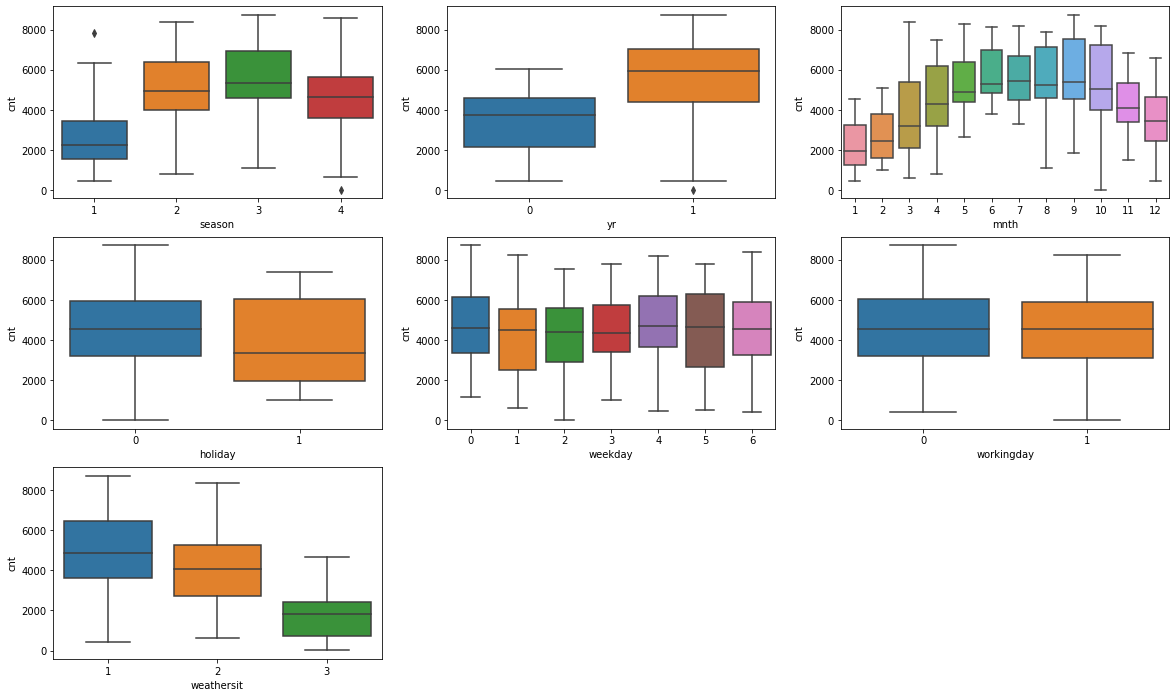

In [7]:
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = BikeSharing_Data)
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = BikeSharing_Data)
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = BikeSharing_Data)
plt.subplot(3,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = BikeSharing_Data)
plt.subplot(3,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = BikeSharing_Data)
plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = BikeSharing_Data)
plt.subplot(3,3,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = BikeSharing_Data)
plt.show()

- The count of bike sharing for first season is least
- The number of bike shares incresed in 2019
- The cnt values increases in summer months
- The count values are less during holidays
- Weekday and working day do not show major variation in their results
- The count has zero values for weather situation - 'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog'(cat no 4)



##### NOW AFTER SEEING THE DISTRIBUTION OF VARIOUS DISCRETE AS WELL AS CONTINUOUS VARIABLES WE CAN SEE THE INTERREALTION B/W THEM USING A HEAT MAP.


<AxesSubplot:>

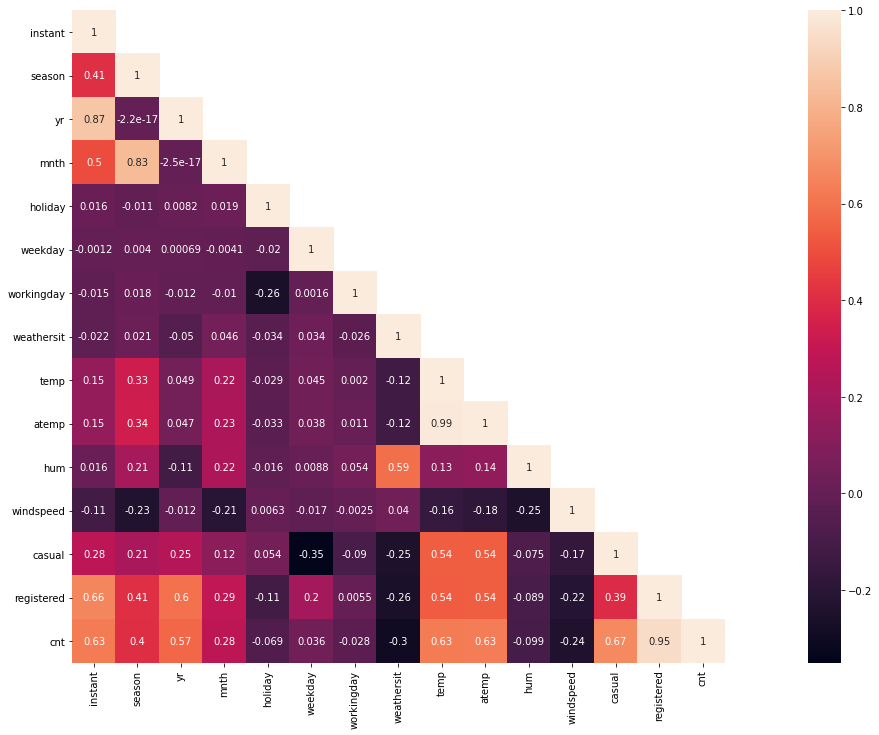

In [8]:
cor_mat= BikeSharing_Data[:].corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(30,12)
sns.heatmap(data=cor_mat,mask=mask,square=True,annot=True,cbar=True)

INFERENCES FROM THE ABOVE HEATMAP--
- self realtion i.e. of a feature to itself is equal to 1 as expected.

- temp and atemp are highly related as expected.

- Also note that count and holiday are highly inversely related as you would expect.

- Also note that temp(or atemp) highly effects the count.

- Also note that weather and count are highly inversely related. This is bcoz weather is getting more worse and so lesser people will rent bikes.



## Step 3: Data Preparation

In [9]:
# Dropping unwanted columns
BikeSharing_Data.drop(['instant','dteday','casual','registered'], axis=1, inplace=True)
BikeSharing_Data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


Converting numerical into categorical as when we create dummpy variable it become quite confusing to differentiate between what season_1 stands for what season_2 so we first we rename it after that go for dumpy variables

In [10]:
import calendar
BikeSharing_Data['mnth']=BikeSharing_Data['mnth'].apply(lambda x: calendar.month_abbr[x])

In [11]:
BikeSharing_Data['season']= BikeSharing_Data['season'].map({1:'Spring', 2:'Summer', 3:'Autum', 4:'Winter'})

In [12]:
BikeSharing_Data['weathersit'] = BikeSharing_Data['weathersit'].map({1:'Clear',2:'Mist & Cloudy', 
                                             3:'Light Snow & Rain',4:'Heavy Snow & Rain'})

In [13]:
BikeSharing_Data['weekday'] = BikeSharing_Data['weekday'].map({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thrusday",5:"Friday",6:"Saturday"})

In [14]:
BikeSharing_Data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,Monday,1,Mist & Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Tuesday,1,Mist & Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Wednesday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Thrusday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Friday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


#### DUMMY VARIABLES

In [15]:

dummy = BikeSharing_Data[['season','mnth','weekday','weathersit']]

In [16]:

dummy = pd.get_dummies(dummy,drop_first=True )

In [17]:
# adding dummy variables to original dataset
BikeSharing_Data = pd.concat([dummy,BikeSharing_Data],axis = 1)

In [18]:

BikeSharing_Data.head()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Monday,1,Mist & Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Tuesday,1,Mist & Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Wednesday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Thrusday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Friday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [19]:

BikeSharing_Data.drop(['season', 'mnth', 'weekday','weathersit'], axis = 1, inplace = True)

In [20]:

BikeSharing_Data.shape

(730, 30)

## Step 4: Splitting the Data into Training and Testing Sets
As you know, the first basic step for regression is performing a train-test split.

In [21]:
df_train, df_test= train_test_split(BikeSharing_Data, train_size= 0.7, test_size=0.3, random_state=100)

### Rescaling the Features
All the columns have small integer values. So it is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale.

In [22]:
# Apply scaler() to all the columns dummy' variables
scaler = MinMaxScaler()
num_vars = ['cnt','hum','windspeed','temp','atemp']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [23]:
df_train.head()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
653,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243
576,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658
426,1,0,0,0,0,0,0,0,0,1,...,0,1,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255
728,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096
482,0,1,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973


In [24]:
df_train.describe()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.243137,0.245098,0.24902,0.096078,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,...,0.029412,0.343137,0.507843,0.025490,0.711765,0.537262,0.512989,0.650369,0.320768,0.513620
std,0.429398,0.430568,0.43287,0.294988,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,...,0.169124,0.475223,0.500429,0.157763,0.453386,0.225844,0.212385,0.145882,0.169797,0.224593
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420
50%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638
75%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


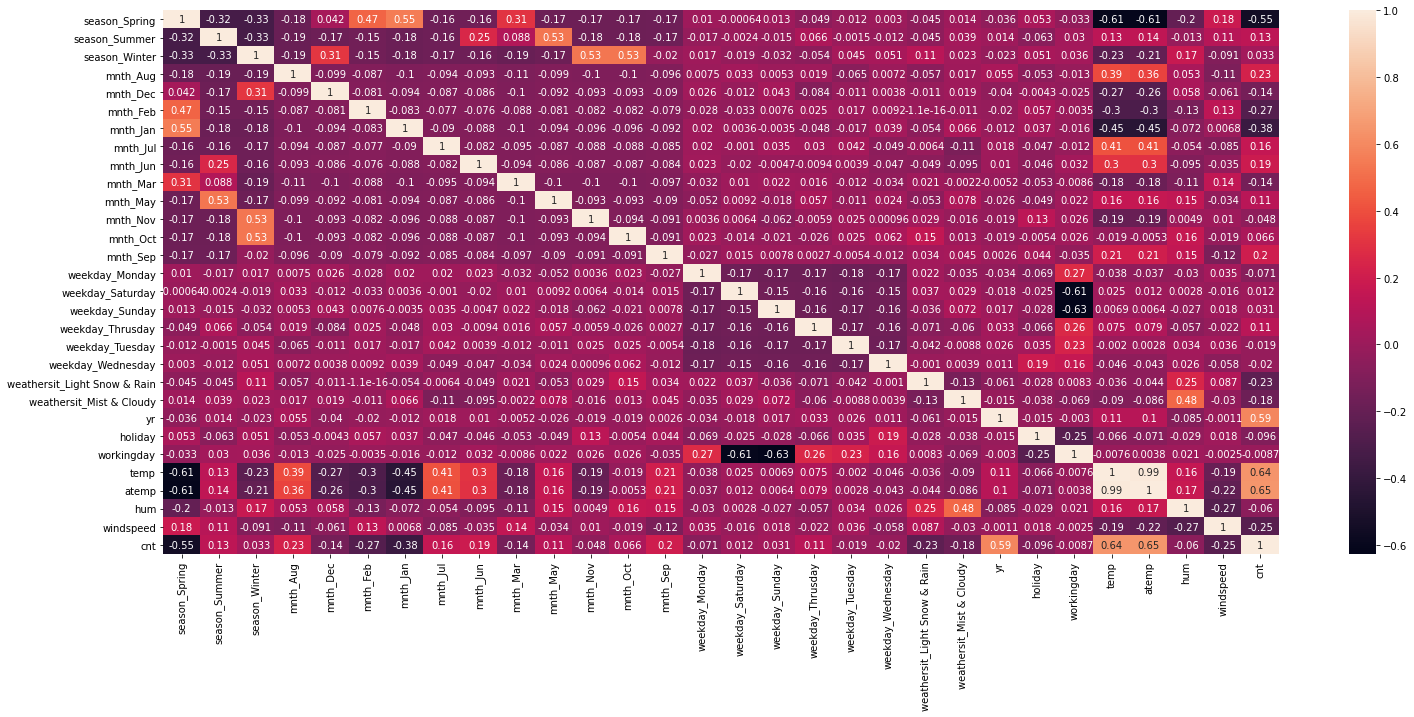

In [25]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (25, 10))
sns.heatmap(df_train.corr(), annot = True)
plt.show()

#### Dividing into X and Y sets for the model building


In [26]:
y_train = df_train.pop('cnt')
X_train = df_train

## Step 5: Building a linear model
Using sklearn  

In [27]:
# Running RFE with the output number of the variable equal to 10
lm= LinearRegression()
lm.fit(X_train, y_train)
rfe= RFE(lm,13)
rfe= rfe.fit(X_train, y_train)

In [28]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('season_Spring', True, 1),
 ('season_Summer', True, 1),
 ('season_Winter', True, 1),
 ('mnth_Aug', False, 12),
 ('mnth_Dec', False, 3),
 ('mnth_Feb', False, 4),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 16),
 ('mnth_Mar', False, 17),
 ('mnth_May', False, 9),
 ('mnth_Nov', False, 2),
 ('mnth_Oct', False, 14),
 ('mnth_Sep', True, 1),
 ('weekday_Monday', False, 11),
 ('weekday_Saturday', False, 6),
 ('weekday_Sunday', False, 7),
 ('weekday_Thrusday', False, 15),
 ('weekday_Tuesday', False, 10),
 ('weekday_Wednesday', False, 13),
 ('weathersit_Light Snow & Rain', True, 1),
 ('weathersit_Mist & Cloudy', True, 1),
 ('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 5),
 ('temp', True, 1),
 ('atemp', False, 8),
 ('hum', True, 1),
 ('windspeed', True, 1)]

In [29]:
col= X_train.columns[rfe.support_] # Top 10 columns which RFE selects
col

Index(['season_Spring', 'season_Summer', 'season_Winter', 'mnth_Jan',
       'mnth_Jul', 'mnth_Sep', 'weathersit_Light Snow & Rain',
       'weathersit_Mist & Cloudy', 'yr', 'holiday', 'temp', 'hum',
       'windspeed'],
      dtype='object')

In [30]:
X_train.columns[~rfe.support_] # Columns that RFE not select

Index(['mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jun', 'mnth_Mar', 'mnth_May',
       'mnth_Nov', 'mnth_Oct', 'weekday_Monday', 'weekday_Saturday',
       'weekday_Sunday', 'weekday_Thrusday', 'weekday_Tuesday',
       'weekday_Wednesday', 'workingday', 'atemp'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [31]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe= X_train[col]


In [32]:
# Adding a constant variable
X_train_rfe= sm.add_constant(X_train_rfe)

In [33]:
# Running the linear model
lm= sm.OLS(y_train, X_train_rfe).fit()

In [34]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.5
Date:                Sat, 26 Dec 2020   Prob (F-statistic):          4.45e-190
Time:                        02:20:46   Log-Likelihood:                 511.29
No. Observations:                 510   AIC:                            -994.6
Df Residuals:                     496   BIC:                            -935.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [35]:
# Dropping mnth_Dec since it has p > 0.05

In [36]:
X_train_new=X_train_rfe.drop(['mnth_Jan'], axis=1)

### Rebuilding the model without mnth_Dec

In [37]:
# Adding a constant variable
X_train_lm= sm.add_constant(X_train_new)

In [38]:
lm= sm.OLS(y_train, X_train_lm).fit()


In [39]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     221.2
Date:                Sat, 26 Dec 2020   Prob (F-statistic):          1.69e-190
Time:                        02:20:46   Log-Likelihood:                 509.47
No. Observations:                 510   AIC:                            -992.9
Df Residuals:                     497   BIC:                            -937.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.2841      0.034      8.242      0.000       0.216       0.352
season_Spring                   -0.0562      0.021     -2.695      0.007      -0.097      -0.015
season_Summer                    0.0519      0.015      3.457      0.001       0.022       0.081
season_Winter                    0.0987      0.017      5.719      0.000       0.065       0.133
mnth_Jul                        -0.0575      0.018     -3.140      0.002      -0.094      -0.022
mnth_Sep                         0.0830      0.017      4.962      0.000       0.050       0.116
weathersit_Light Snow & Rain    -0.2382      0.026     -9.034      0.000      -0.290      -0.186
weathersit_Mist & Cloudy        -0.0542      0.011     -5.151      0.000      -0.075      -0.034
yr                               0.2293      0.008     28.219      0.000       0.213       0.245
holiday                         -0.0974      0.026     -3.809      0.000      -0.148      -0.047
temp                             0.5300      0.034     15.739      0.000       0.464       0.596
hum                             -0.1710      0.038     -4.526      0.000      -0.245      -0.097
windspeed                       -0.1819      0.026     -7.066      0.000      -0.233      -0.131
==============================================================================
Omnibus:                       57.560   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              131.574
Skew:                          -0.610   Prob(JB):                     2.69e-29
Kurtosis:                       5.169   Cond. No.                         19.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Checking VIF for multicollinearity

In [40]:
X_train_new = X_train_new.drop(['const'], axis=1)

In [41]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
X=X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,hum,28.06
9,temp,16.02
11,windspeed,4.65
0,season_Spring,4.01
2,season_Winter,3.35
1,season_Summer,2.78
6,weathersit_Mist & Cloudy,2.28
7,yr,2.08
3,mnth_Jul,1.58
4,mnth_Sep,1.38


In [42]:
# dropping hum from model
X_train_new = X_train_new.drop(['hum'], axis=1)

### Rebuilding the model without hum

In [43]:
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)

# Create a first fitted model
lm = sm.OLS(y_train,X_train_lm).fit()   

In [44]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.4
Date:                Sat, 26 Dec 2020   Prob (F-statistic):          2.40e-187
Time:                        02:20:46   Log-Likelihood:                 499.17
No. Observations:                 510   AIC:                            -974.3
Df Residuals:                     498   BIC:                            -923.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.1996      0.030      6.758      0.000       0.142       0.258
season_Spring                   -0.0669      0.021     -3.167      0.002      -0.108      -0.025
season_Summer                    0.0453      0.015      2.971      0.003       0.015       0.075
season_Winter                    0.0831      0.017      4.818      0.000       0.049       0.117
mnth_Jul                        -0.0524      0.019     -2.811      0.005      -0.089      -0.016
mnth_Sep                         0.0767      0.017      4.511      0.000       0.043       0.110
weathersit_Light Snow & Rain    -0.2852      0.025    -11.536      0.000      -0.334      -0.237
weathersit_Mist & Cloudy        -0.0816      0.009     -9.301      0.000      -0.099      -0.064
yr                               0.2335      0.008     28.361      0.000       0.217       0.250
holiday                         -0.0980      0.026     -3.761      0.000      -0.149      -0.047
temp                             0.4915      0.033     14.798      0.000       0.426       0.557
windspeed                       -0.1480      0.025     -5.893      0.000      -0.197      -0.099
==============================================================================
Omnibus:                       59.298   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              135.189
Skew:                          -0.628   Prob(JB):                     4.41e-30
Kurtosis:                       5.187   Cond. No.                         17.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
# Calculate the VIFs for the new model again
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,temp,5.09
10,windspeed,4.60
1,season_Summer,2.21
0,season_Spring,2.08
7,yr,2.07
2,season_Winter,1.79
3,mnth_Jul,1.58
6,weathersit_Mist & Cloudy,1.55
4,mnth_Sep,1.34
5,weathersit_Light Snow & Rain,1.08


## Step:6  Residual Analysis of the train data
So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [46]:
y_train_price= lm.predict(X_train_lm)


Text(0.5, 0, 'Errors')

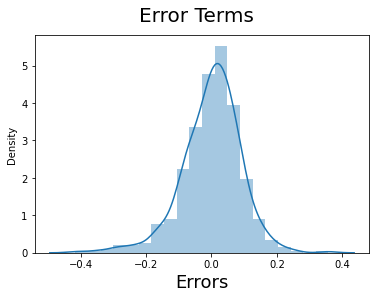

In [47]:
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  

## Step 7: Making Predictions Using the Final Model
Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final.

In [48]:
num_vars = ['cnt','hum','windspeed','temp','atemp']
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [49]:
df_test.describe()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.255708,0.264840,0.232877,0.059361,0.086758,0.100457,0.077626,0.105023,0.095890,0.054795,...,0.027397,0.319635,0.479452,0.036530,0.639269,0.558941,0.532991,0.638508,0.313350,0.520592
std,0.437258,0.442259,0.423633,0.236840,0.282125,0.301297,0.268194,0.307285,0.295115,0.228100,...,0.163612,0.467403,0.500722,0.188034,0.481313,0.233698,0.217888,0.148974,0.159947,0.218435
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300


In [50]:
y_test = df_test.pop('cnt')
X_test = df_test

In [51]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

# Making predictions using final model
y_pred = lm.predict(X_test_new)

In [52]:
r2_score(y_test, y_pred)

0.8049418440982381

In [53]:
mse = mean_squared_error(y_test, y_pred)
mse

0.009264444750858143

### Step 8:Model Evaluation

Text(0, 0.5, 'y_pred')

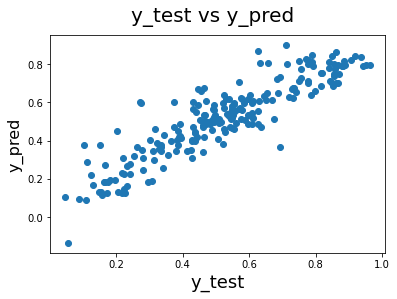

In [54]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

We can see that the equation of our best fitted line is:
0.1996+0.0453Xseason_Summer+0.0831Xseason_Winter+0.0767Xmnth_Sep+0.2335Xyr+0.4915Xtemp-0.0669Xseason_Spring- 0.0524Xmnth_Jul-0.2852Xweathersit_Light Snow & Rain	-0.0816Xweathersit_Mist & Cloudy-0.0980Xholiday-0.1480Xwindspeed

#### All the positive coefficients like season_Summer indicate, season_Winter, temp etc. indicate that an increase in these values will lead to an increase in the value of cnt.

#### All the negative coefficients indicate that an increase in these values will lead to an decrease in the value of cnt.¶

1. Temp and season has large cofficient 
2. Bike rentals is more in september month
3. Bike rentals is more in summer and winters as compare to rainy
4. The rentals reduce during holidays

So this indicate that bike rental is majorly affected by temperature, season and month